# Linear Least Squares Fitting for Virial and Van der Waals Equation

**Rio Agustian Gilang Fernando**

**Advancerd Material Science and Nanotechnology**

*Question*

The virial and van der Waals equations of state for a gas are given, respectively, by

\begin{align}
P_{virial} =& \frac{RT}{V_m} \left( 1 + \frac{B}{V_m} + \frac{C}{V_m^2} + ...\right) \\
P_{VdW} =& \frac{RT}{V_m - b} - \frac{a}{V_m^2}
\end{align}

Show that the second and third virial coefficients B and C are related to the van der Waals constants a and b through the relations:

$$
B = b - \frac{a}{RT} \quad \mathrm{and} \quad C = b^2
$$

The file Ar-virial.txt, available at https://scipython.com/chem/goc/ contains measurement of the scond virial coefficient for argon as a function of tempereature, B(T). Fit these data to the above equation to obtain values for a and b. Compare with the literature values a = 1.355 L^2 bar mol^-2 and b = 0.03201 L mol^-1.

*Solution:*

Rearrange the van der Waals equations of state to 

$$
P_{VAW} = \frac{RT}{V_m} \left( \frac{1}{1-\frac{b}{V_m}} - \frac{a}{RTV_m}\right),
$$

where $b/Vm \ll 1$ and use the Taylor series expansion $(1-x)^{-1} = 1 + x + x^2 + ...$ for $x b/V_m$ to give

$$
P_{VdW} = \frac{RT}{V_m} \left(1 + \frac{b}{V_m} + \frac{b^2}{V_m^2} + ... - \frac{a}{RTV_m}\right).
$$

Comparison of the terms in different powers of $1/V_m$ in the virial equation of state,

$$
p_{virial} = \frac{RT}{V_m} \left(1 + \frac{B}{V_m} + \frac{C}{V^2_{m}} \right),
$$

gives

$$
B = b -\frac{a}{RT} \quad \mathrm{and} \quad C = b^2
$$

The provided data can be plotted using Matplotlib:

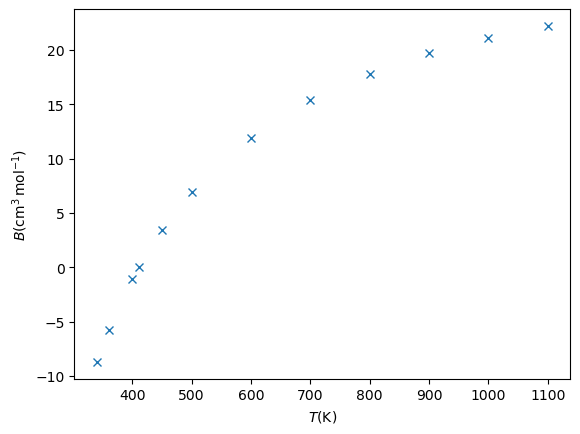

In [29]:
import numpy as np
from scipy.constants import R
import matplotlib.pyplot as plt

T, B = np.loadtxt(r"C:\Users\Rio Agustian\Documents\S2\CHEMISTRY\CODE\Ar-virial.txt", skiprows=3, unpack=True)

plt.plot(T, B, 'x')
plt.xlabel(r'$T (\mathrm{K})$')
plt.ylabel(r'$B (\mathrm{cm^3 \, mol^{-1}})$')
plt.show()

The equation relating B(T) to a and b is linear in the van der Waals parameters, and so can be fitted with ordinary linear least squares (equivalent to finding a best-fit straight line to a plot of B against 1/T).

The matrix is:

$$
\textbf{X} = 
\begin{pmatrix}
1 & 1/T_1 \\
1 & 1/T_2 \\
\vdots & \vdots \\
1 & 1/T_n \\
\end{pmatrix}
$$

and gives the measured values of B(T),

$$
\textbf{B} = 
\begin{pmatrix}
B(T_1) \\
B(T_2) \\
\vdots  \\
B(T_n) \\
\end{pmatrix}
$$

we seek the parameter vector $\boldsymbol{\hat{\beta}}$ that best solves the over-determined system of equations $\boldsymbol{B = \mathrm{X} \beta}$. The elements of $\boldsymbol{\hat{\beta}}$ are then related to the van der Waals constants through

$$
\boldsymbol{\hat{\beta}} =
\begin{pmatrix}
b \\
-\frac{a}{R}
\end{pmatrix}.
$$


```np.linalg.lstsq``` can be used to perform the fit, as before:

In [54]:
X = np.vstack((np.ones(len(B)), 1/T)).T
res = np.linalg.lstsq(X, B, rcond=None)
res

(array([    36.65180953, -15156.14919878]),
 array([2.32226311]),
 2,
 array([3.46410756e+00, 2.38668255e-03]))

This fit seems to be well-behave (the ran of X is 2, the same as the number of parameters to be fitted). To compare the fit to the data it is sufficient to evaluate $\boldsymbol{B}_{\mathrm{fit}} = \boldsymbol{\mathrm{X} . \hat{\beta}}$:

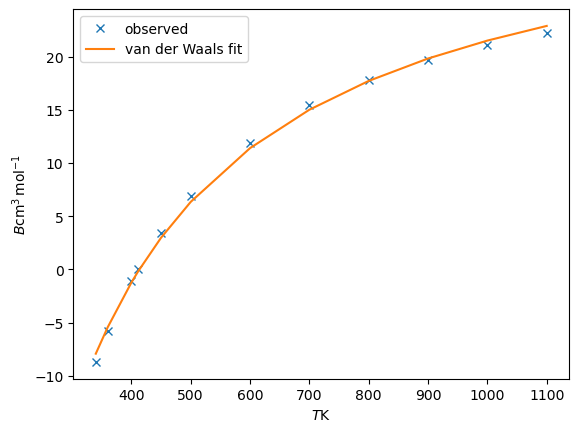

In [64]:
plt.plot(T, B, 'x', label='observed')
beta_fit = res[0]
Bfit = X @ beta_fit
plt.plot(T, Bfit, label='van der Waals fit')
plt.xlabel(r'$T \mathrm{K}$')
plt.ylabel(r'$B \mathrm{cm^3 \, mol^{-1}}$')
plt.legend()
plt.show()

In [67]:
# Extract the van der Waals constants from the fitted coefficients and convert
# to SI units (a in J.m3.mol-2 and b in m3.mol-1).
b, a = beta_fit[0] / 1.e6, -R * beta_fit[1] / 1.e6
# Now convert to the conventional units, a in L2.bar.mol-2, b in lmol-1
b = b * 1000
a = a * 1.e6 / 1.e5
print(f'a = {a:2f} L2.bar.mol-2')
print(f'b = {b:2f} L.mol-1')

a = 1.260152 L2.bar.mol-2
b = 0.036652 L.mol-1


These values are in reasonable agreement wit the literature values a = 1.355 L^2 bar mol^{-1} and b = 0.03201 L mol^{-1}.